Data cleaning >>>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 

steps = pd.read_csv("steps.csv", sep = ";")
survey = pd.read_csv("survey.csv")

df = pd.merge(steps, survey, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
# Create mean steps per participant variable

mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1)
mean_steps.head()

0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
dtype: float64

Exploratory data analysis >>>

In [3]:
# create a new pandas Dataframe out of the variable
df_set = pd.DataFrame(mean_steps)
# changing the name of the column
df_set = df_set.rename(columns = {0 : "mean"})
# creating a new id column based on the index of the dataframe + 1
df_set["id"] = df_set.index +1
# create a new variable cols to rearange columns
cols = df_set.columns.tolist()
# rearanging columns
cols = cols[-1:] + cols[:-1]
df_set = df_set[cols]
# reseting the index
df_set = df_set.reset_index(drop = True)
df_set.head(5)

,id,mean
0,1,10205.521212
1,2,5687.423313
2,3,8301.729730
3,4,3633.200000
4,5,5312.129630


In [4]:
# joining the master data frame with the new mean dataframe
df = pd.merge(df, df_set, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


In [5]:
# creating a subset dataframe

df_subset = df[["mean", "height", "weight"]]
df_subset

,mean,height,weight
0,10205.521212,178.0,98.0
1,5687.423313,180.0,77.0
2,8301.729730,180.0,83.0
3,3633.200000,178.0,80.0
4,5312.129630,167.0,61.0
...,...,...,...
924,6282.131868,165.0,59.0
925,4799.880000,192.0,90.0
926,10030.326829,181.0,71.0
927,15679.679012,172.0,65.0


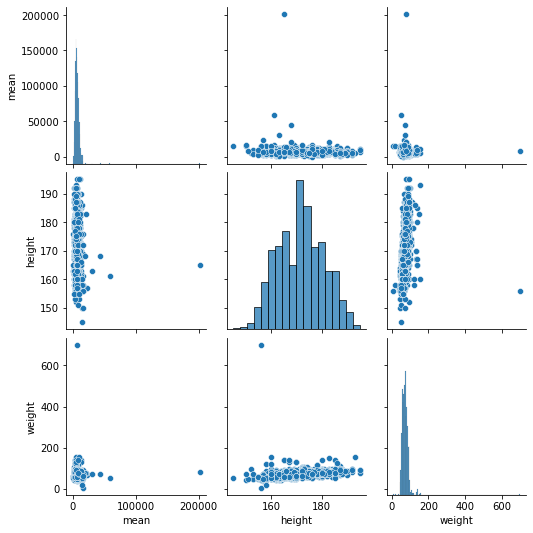

In [6]:
# creating a plot without removing anamolies.

sns.pairplot(df_subset)
plt.show()

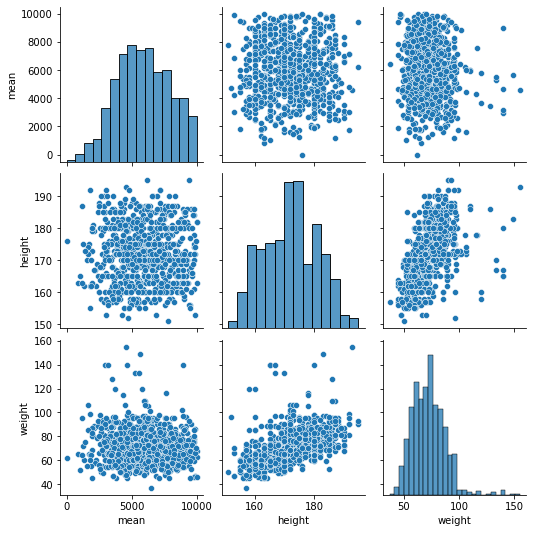

In [11]:
#creating a plot with removed anamolies.

df_subset = df_subset[(df_subset["height"] > 0) & (df_subset["weight"] > 30) & (df_subset["weight"] < 200) & (df_subset["mean"] < 15000) ] 
sns.pairplot(df_subset)
plt.show()